# Carga de datos

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [2]:
path = '/content/drive/MyDrive/Data Science - Skillnet/Ejercicios core Machine Learning/BBDD/Automobile_data (1).csv'

df = pd.read_csv(path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [4]:
df.head (10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


#Limpieza de datos

In [5]:
#Cambiamos las columnas en minusculas sustituir espacios por guiones bajos.
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [7]:
#Búsqueda de duplicados.
df.duplicated().sum()

np.int64(0)

In [8]:
#reemplazar todos los ? en el df por Nan

import numpy as np

df = df.replace('?', np.nan)
df.isna().sum()


,0
symboling,0
normalized-losses,41
make,0
fuel-type,0
aspiration,0
num-of-doors,2
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


In [9]:
#transformar a numericas todas las columnas que tienen Nan

# Seleccionar columnas con valores NaN
cols_with_nan = df.columns[df.isna().any()].tolist()

# Convertir las columnas seleccionadas a tipo numérico, coaccionando errores a NaN
for col in cols_with_nan:
  df[col] = pd.to_numeric(df[col], errors='coerce')

# Verificar el resultado
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       0 non-null      float64
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,NaN,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,NaN,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,NaN,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,NaN,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,NaN,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,NaN,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,NaN,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,NaN,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,NaN,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,NaN,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


In [10]:
# prompt: dropear columnas que no son: curb-weight, engine-size, horsepower, highway-mpg, width, city-mpg, wheel-base, normalized-losses, peak-rpm, length, height, bore, compression-ratio, stroke, symboling

cols_to_keep = ['curb-weight', 'engine-size', 'horsepower', 'width', 'wheel-base', 'normalized-losses', 'peak-rpm', 'length', 'height', 'bore', 'compression-ratio', 'stroke', 'symboling', 'price']
df = df[cols_to_keep]
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   curb-weight        205 non-null    int64  
 1   engine-size        205 non-null    int64  
 2   horsepower         203 non-null    float64
 3   width              205 non-null    float64
 4   wheel-base         205 non-null    float64
 5   normalized-losses  164 non-null    float64
 6   peak-rpm           203 non-null    float64
 7   length             205 non-null    float64
 8   height             205 non-null    float64
 9   bore               201 non-null    float64
 10  compression-ratio  205 non-null    float64
 11  stroke             201 non-null    float64
 12  symboling          205 non-null    int64  
 13  price              201 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 22.6 KB


In [11]:
df[df['horsepower'].isna()]

,curb-weight,engine-size,horsepower,width,wheel-base,normalized-losses,peak-rpm,length,height,bore,compression-ratio,stroke,symboling,price
130,2579,132,NaN,66.5,96.1,NaN,NaN,181.5,55.2,3.46,8.7,3.9,0,9295.0
131,2460,132,NaN,66.6,96.1,NaN,NaN,176.8,50.5,3.46,8.7,3.9,2,9895.0


In [12]:
# imputar columna horsepower con columna con mayor relacion.

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Encontrar la columna con la mayor correlación absoluta con 'horsepower'
correlacion_con_horsepower = correlation_matrix['horsepower'].abs().sort_values(ascending=False)
mayor_correlacion_columna = correlacion_con_horsepower.index[1] # El primer índice es 'horsepower'.

print(f"La columna con mayor correlación con 'horsepower' es: {mayor_correlacion_columna}")

# Imputar los valores NaN en 'horsepower'
df['horsepower'] = df.apply(lambda row: row[mayor_correlacion_columna] if pd.isna(row['horsepower']) else row['horsepower'], axis=1)

# Verificar si quedan valores NaN en 'horsepower'
print("\nValores NaN restantes en 'horsepower':")
print(df['horsepower'].isna().sum())

La columna con mayor correlación con 'horsepower' es: engine-size

Valores NaN restantes en 'horsepower':
0


In [13]:
# importa columna normalized-losses con columna con mayor relacion,

# Encontrar la columna con la mayor correlación absoluta con 'normalized-losses'.
correlacion_con_normalized_losses = correlation_matrix['normalized-losses'].abs().sort_values(ascending=False)
mayor_correlacion_columna_nl = correlacion_con_normalized_losses.index[1] # El primer índice es 'normalized-losses'.

print(f"La columna con mayor correlación con 'normalized-losses' es: {mayor_correlacion_columna_nl}")

# Imputar los valores NaN en 'normalized-losses'
df['normalized-losses'] = df.apply(lambda row: row[mayor_correlacion_columna_nl] if pd.isna(row['normalized-losses']) else row['normalized-losses'], axis=1)

# Verificar si quedan valores NaN en 'normalized-losses'.
print("\nValores NaN restantes en 'normalized-losses':")
print(df['normalized-losses'].isna().sum())


La columna con mayor correlación con 'normalized-losses' es: symboling

Valores NaN restantes en 'normalized-losses':
0


In [14]:
# imputar columna peak-rpm con columna con mayor relacion.

# Encontrar la columna con la mayor correlación absoluta con 'peak-rpm'
correlacion_con_peak_rpm = correlation_matrix['peak-rpm'].abs().sort_values(ascending=False)
mayor_correlacion_columna_pr = correlacion_con_peak_rpm.index[1] # El primer índice es 'peak-rpm'.

print(f"La columna con mayor correlación con 'peak-rpm' es: {mayor_correlacion_columna_pr}")

# Imputar los valores NaN en 'peak-rpm'
df['peak-rpm'] = df.apply(lambda row: row[mayor_correlacion_columna_pr] if pd.isna(row['peak-rpm']) else row['peak-rpm'], axis=1)

# Verificar si quedan valores NaN en 'peak-rpm'.
print("\nValores NaN restantes en 'peak-rpm':")
print(df['peak-rpm'].isna().sum())


La columna con mayor correlación con 'peak-rpm' es: compression-ratio

Valores NaN restantes en 'peak-rpm':
0


In [15]:

# imputar columna bore con columna con mayor relacion.

# Encontrar la columna con la mayor correlación absoluta con 'bore'
correlacion_con_bore = correlation_matrix['bore'].abs().sort_values(ascending=False)
mayor_correlacion_columna_b = correlacion_con_bore.index[1] # El primer índice es 'bore'.

print(f"La columna con mayor correlación con 'bore' es: {mayor_correlacion_columna_b}")

# Imputar los valores NaN en 'bore'
df['bore'] = df.apply(lambda row: row[mayor_correlacion_columna_b] if pd.isna(row['bore']) else row['bore'], axis=1)

# Verificar si quedan valores NaN en 'bore'.
print("\nValores NaN restantes en 'bore':")
print(df['bore'].isna().sum())

La columna con mayor correlación con 'bore' es: curb-weight

Valores NaN restantes en 'bore':
0


In [16]:
# imputar columna stroke con columna con mayor relacion.

# Encontrar la columna con la mayor correlación absoluta con 'stroke'
correlacion_con_stroke = correlation_matrix['stroke'].abs().sort_values(ascending=False)
mayor_correlacion_columna_s = correlacion_con_stroke.index[1] # El primer índice es 'stroke'.

print(f"La columna con mayor correlación con 'stroke' es: {mayor_correlacion_columna_s}")

# Imputar los valores NaN en 'stroke'
df['stroke'] = df.apply(lambda row: row[mayor_correlacion_columna_s] if pd.isna(row['stroke']) else row['stroke'], axis=1)

# Verificar si quedan valores NaN en 'stroke'.
print("\nValores NaN restantes en 'stroke':")
print(df['stroke'].isna().sum())

La columna con mayor correlación con 'stroke' es: engine-size

Valores NaN restantes en 'stroke':
0


In [17]:
# imputar columna price con columna con mayor relacion.

# Encontrar la columna con la mayor correlación absoluta con 'price'
correlacion_con_price = correlation_matrix['price'].abs().sort_values(ascending=False)
mayor_correlacion_columna_p = correlacion_con_price.index[1] # El primer índice es 'price'.

print(f"La columna con mayor correlación con 'price' es: {mayor_correlacion_columna_p}")

# Imputar los valores NaN en 'price'
df['price'] = df.apply(lambda row: row[mayor_correlacion_columna_p] if pd.isna(row['price']) else row['price'], axis=1)

# Verificar si quedan valores NaN en 'price'.
print("\nValores NaN restantes en 'price':")
print(df['price'].isna().sum())

La columna con mayor correlación con 'price' es: engine-size

Valores NaN restantes en 'price':
0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   curb-weight        205 non-null    int64  
 1   engine-size        205 non-null    int64  
 2   horsepower         205 non-null    float64
 3   width              205 non-null    float64
 4   wheel-base         205 non-null    float64
 5   normalized-losses  205 non-null    float64
 6   peak-rpm           205 non-null    float64
 7   length             205 non-null    float64
 8   height             205 non-null    float64
 9   bore               205 non-null    float64
 10  compression-ratio  205 non-null    float64
 11  stroke             205 non-null    float64
 12  symboling          205 non-null    int64  
 13  price              205 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 22.6 KB


#EDA

In [19]:
df.describe()

,curb-weight,engine-size,horsepower,width,wheel-base,normalized-losses,peak-rpm,length,height,bore,compression-ratio,stroke,symboling,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,2555.565854,126.907317,104.526829,65.907805,98.756585,97.800000,5075.450732,174.049268,53.724878,50.313561,10.142537,4.606537,0.834146,12951.936585
std,520.680204,41.642693,39.613643,2.145204,6.021776,57.948879,694.027832,12.337289,2.443522,333.947867,3.972040,9.625354,1.245307,8075.025984
min,1488.000000,61.000000,48.000000,60.300000,86.600000,-1.000000,8.700000,141.100000,47.800000,2.540000,7.000000,2.070000,-2.000000,90.000000
25%,2145.000000,97.000000,70.000000,64.100000,94.500000,77.000000,4800.000000,166.300000,52.000000,3.150000,8.600000,3.110000,0.000000,7689.000000
50%,2414.000000,120.000000,95.000000,65.500000,97.000000,103.000000,5200.000000,173.200000,54.100000,3.310000,9.000000,3.290000,1.000000,10198.000000
75%,2935.000000,141.000000,120.000000,66.900000,102.400000,137.000000,5500.000000,183.100000,55.500000,3.600000,9.400000,3.410000,2.000000,16500.000000
max,4066.000000,326.000000,288.000000,72.300000,120.900000,256.000000,6600.000000,208.100000,59.800000,2500.000000,23.000000,80.000000,3.000000,45400.000000


Observamos un numero negativo en symboling, observamos outliers

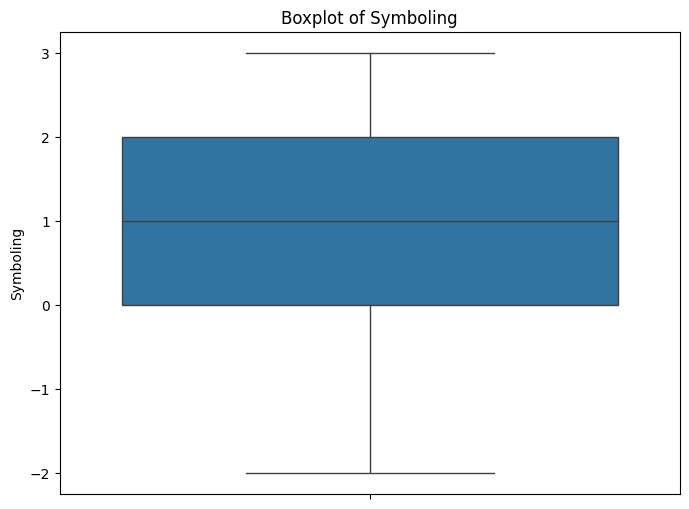

In [20]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['symboling'])
plt.title('Boxplot of Symboling')
plt.ylabel('Symboling')
plt.show()


No se observa ningún outlier, creamos mas visualizaciones

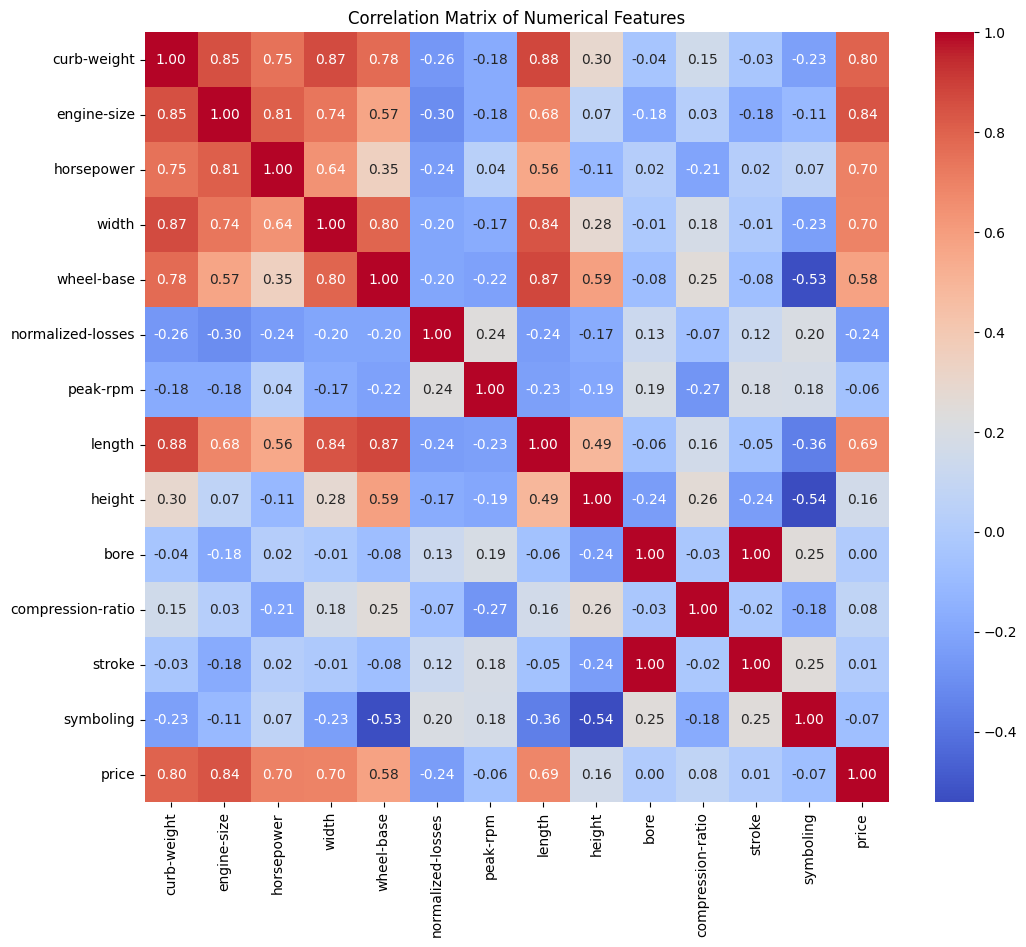

In [21]:
# Seleccionamos Columnas numericas
numerical_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_cols].corr()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()



## Análisis de gráficos
**Boxplot de Symboling:**
El gráfico sugiere que no hay valores atípicos significativos en 'symboling'.

**Matriz de Correlación (Heatmap):**
El análisis de correlación revela que las variables más influyentes en el precio ('price') son 'engine-size', 'curb-weight' y 'horsepower' (correlaciones >0.7), indicando que vehículos más grandes, pesados y potentes tienden a ser más costosos. También se observan relaciones significativas entre dimensiones ('width', 'length') y el precio, mientras que 'symboling' muestra una leve correlación negativa. Variables como 'height' y 'compression-ratio' presentan baja influencia. Las fuertes correlaciones entre 'curb-weight', 'engine-size' y 'horsepower' reflejan interdependencias esperadas en características técnicas, mientras que 'peak-rpm' y 'height' destacan por su bajo impacto lineal. Estas relaciones sugieren que el tamaño, peso y potencia del motor son predictores clave para modelos de predicción de precios.


#Diagnóstico y Selección de Problema:

**Diagnóstico de las principales características y desafíos del conjunto de datos:**

**Características del dataset:**
El conjunto contiene datos de vehículos con variables numéricas y categóricas, incluyendo una columna objetivo ('price') para predicción. Se han limpiado y transformado columnas (ej: imputación de 'normalized-losses'), pero persisten correlaciones fuertes entre variables y un desbalance notable en la distribución de fabricantes (ej: Toyota domina el dataset).

**Desafíos principales:**
Destacan la necesidad de manejar valores nulos residuales, outliers en variables numéricas, multicolinealidad entre predictores (ej: 'wheel-base' y 'length'), y la codificación de variables categóricas como 'make'. Además, la distribución de 'price' podría requerir transformaciones, y el desbalance de marcas afectaría modelos para fabricantes poco representados.

**Elección de regresión para predecir precios:**
Es el problema más relevante por su aplicación práctica en el sector automotriz y la disponibilidad de 'price' como variable objetivo. Los desafíos incluyen integrar variables categóricas, gestionar outliers, mitigar multicolinealidad y optimizar el modelo para marcas minoritarias, lo que enriquece el proceso de modelado.

# Prepocesamiento de datos


In [22]:
# 1. Definir variables y split
X = df.drop(columns=['price'])
y = df['price']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)
# 2. Identificar todas las columnas como numéricas
numeric_cols = X.columns.tolist()  # Todas las features son numéricas

## 3. Pipeline de preprocesamiento simplificado
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())  # Estandarización de todas las features
])

## 4. Preprocesador final
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols)
    ])



In [23]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score

print("\n" + "="*50)
print("ENTRENANDO REGRESIÓN LINEAL")
print("="*50)

# Pipeline para Regresión Lineal
pipe_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Ajuste del modelo (sin hiperparámetros para LinearRegression, pero incluimos Ridge/Lasso para comparación)
pipe_lr.fit(X_train, y_train)

# Evaluación con validación cruzada
lr_scores = cross_val_score(pipe_lr, X_train_val, y_train_val, cv=5, scoring='neg_mean_squared_error')
lr_rmse = np.sqrt(-lr_scores.mean())

print(f"\nRMSE promedio (CV): {lr_rmse:.2f}")


ENTRENANDO REGRESIÓN LINEAL

RMSE promedio (CV): 5016.85


In [24]:
from sklearn.ensemble import RandomForestRegressor

print("\n" + "="*50)
print("ENTRENANDO RANDOM FOREST")
print("="*50)

# Pipeline para RF
pipe_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Espacio de búsqueda
params_rf = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Búsqueda GridSearchCV
grid_rf = GridSearchCV(pipe_rf, params_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_rf.fit(X_train_val, y_train_val)

print("\nMejores parámetros encontrados:")
print(grid_rf.best_params_)
print(f"Mejor RMSE: {np.sqrt(-grid_rf.best_score_):.2f}")


ENTRENANDO RANDOM FOREST
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Mejores parámetros encontrados:
{'regressor__max_depth': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 300}
Mejor RMSE: 3951.08


In [25]:
from xgboost import XGBRegressor

print("\n" + "="*50)
print("ENTRENANDO XGBOOST")
print("="*50)

# Pipeline para XGBoost
pipe_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42))
])

# Espacio de búsqueda
params_xgb = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__max_depth': [3, 5, 7],
    'regressor__subsample': [0.8, 0.9, 1.0],
    'regressor__colsample_bytree': [0.8, 0.9, 1.0]
}

# Búsqueda GridSearchCV
grid_xgb = GridSearchCV(pipe_xgb, params_xgb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_xgb.fit(X_train_val, y_train_val)

print("\nMejores parámetros encontrados:")
print(grid_xgb.best_params_)
print(f"Mejor RMSE: {np.sqrt(-grid_xgb.best_score_):.2f}")


ENTRENANDO XGBOOST
Fitting 5 folds for each of 243 candidates, totalling 1215 fits

Mejores parámetros encontrados:
{'regressor__colsample_bytree': 0.9, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 100, 'regressor__subsample': 0.8}
Mejor RMSE: 3729.43


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluar_modelo_regresion(modelo, X_train, X_test, y_train, y_test, nombre_modelo):
    """
    Evalúa un modelo de regresión y muestra gráficos relevantes.

    Args:
        modelo: Modelo de regresión entrenado o pipeline
        X_train: Datos de entrenamiento
        X_test: Datos de prueba
        y_train: Target de entrenamiento
        y_test: Target de prueba
        nombre_modelo: Nombre del modelo para los títulos
    """
    # Realizar predicciones
    y_pred_train = modelo.predict(X_train)
    y_pred_test = modelo.predict(X_test)

    # Calcular métricas
    metricas = {
        'RMSE_train': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'RMSE_test': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'MAE_train': mean_absolute_error(y_train, y_pred_train),
        'MAE_test': mean_absolute_error(y_test, y_pred_test),
        'R2_train': r2_score(y_train, y_pred_train),
        'R2_test': r2_score(y_test, y_pred_test)

    }

    # Crear figura con múltiples subplots
    plt.figure(figsize=(18, 12))
    plt.suptitle(f'Análisis del Modelo: {nombre_modelo}', fontsize=16, y=1.02)

    # Gráfico 1: Valores reales vs predichos
    plt.subplot(2, 3, 1)
    sns.scatterplot(x=y_test, y=y_pred_test)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
    plt.xlabel('Valores Reales')
    plt.ylabel('Valores Predichos')
    plt.title('Real vs Predicho (Test)')

    # Gráfico 2: Distribución de errores
    plt.subplot(2, 3, 2)
    errores = y_test - y_pred_test
    sns.histplot(errores, kde=True)
    plt.axvline(x=0, color='r', linestyle='--')
    plt.xlabel('Error')
    plt.ylabel('Frecuencia')
    plt.title('Distribución de Errores')


    # Gráfico 4: Comparación train-test
    plt.subplot(2, 3, 4)
    metrics_to_compare = ['RMSE', 'MAE', 'R2']
    train_values = [metricas['RMSE_train'], metricas['MAE_train'], metricas['R2_train']]
    test_values = [metricas['RMSE_test'], metricas['MAE_test'], metricas['R2_test']]

    x = np.arange(len(metrics_to_compare))
    width = 0.35

    plt.bar(x - width/2, train_values, width, label='Train')
    plt.bar(x + width/2, test_values, width, label='Test')
    plt.xticks(x, metrics_to_compare)
    plt.ylabel('Valor')
    plt.title('Comparación Train-Test')
    plt.legend()


    plt.tight_layout()
    plt.show()

    # Imprimir resultados
    print(f"\n{'-'*60}")
    print(f"EVALUACIÓN DE {nombre_modelo.upper()}")
    print(f"{'-'*60}")
    print(f"{'Métrica':<20}{'Train':<15}{'Test':<15}")
    print(f"{'-'*60}")
    print(f"{'RMSE':<20}{metricas['RMSE_train']:<15.4f}{metricas['RMSE_test']:<15.4f}")
    print(f"{'MAE':<20}{metricas['MAE_train']:<15.4f}{metricas['MAE_test']:<15.4f}{'':<15}")
    print(f"{'-'*60}\n")

    return metricas


COMPARACIÓN FINAL DE MODELOS - AUTOS DATASET (REGRESIÓN)


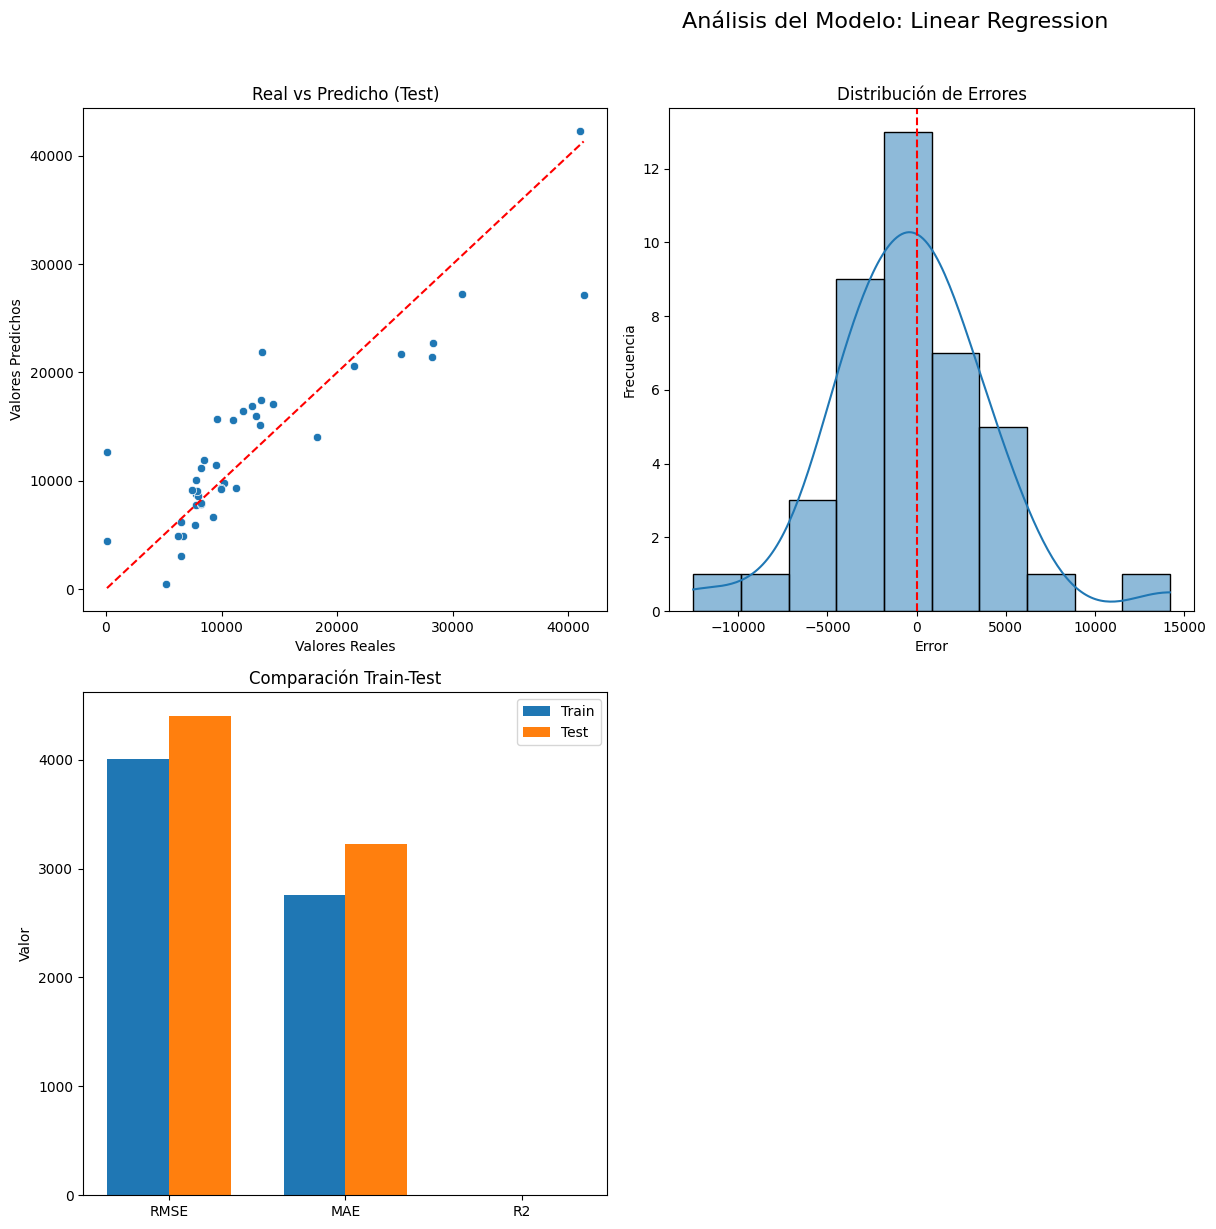


------------------------------------------------------------
EVALUACIÓN DE LINEAR REGRESSION
------------------------------------------------------------
Métrica             Train          Test           
------------------------------------------------------------
RMSE                4006.8491      4400.4858      
MAE                 2755.3378      3224.6362                     
------------------------------------------------------------



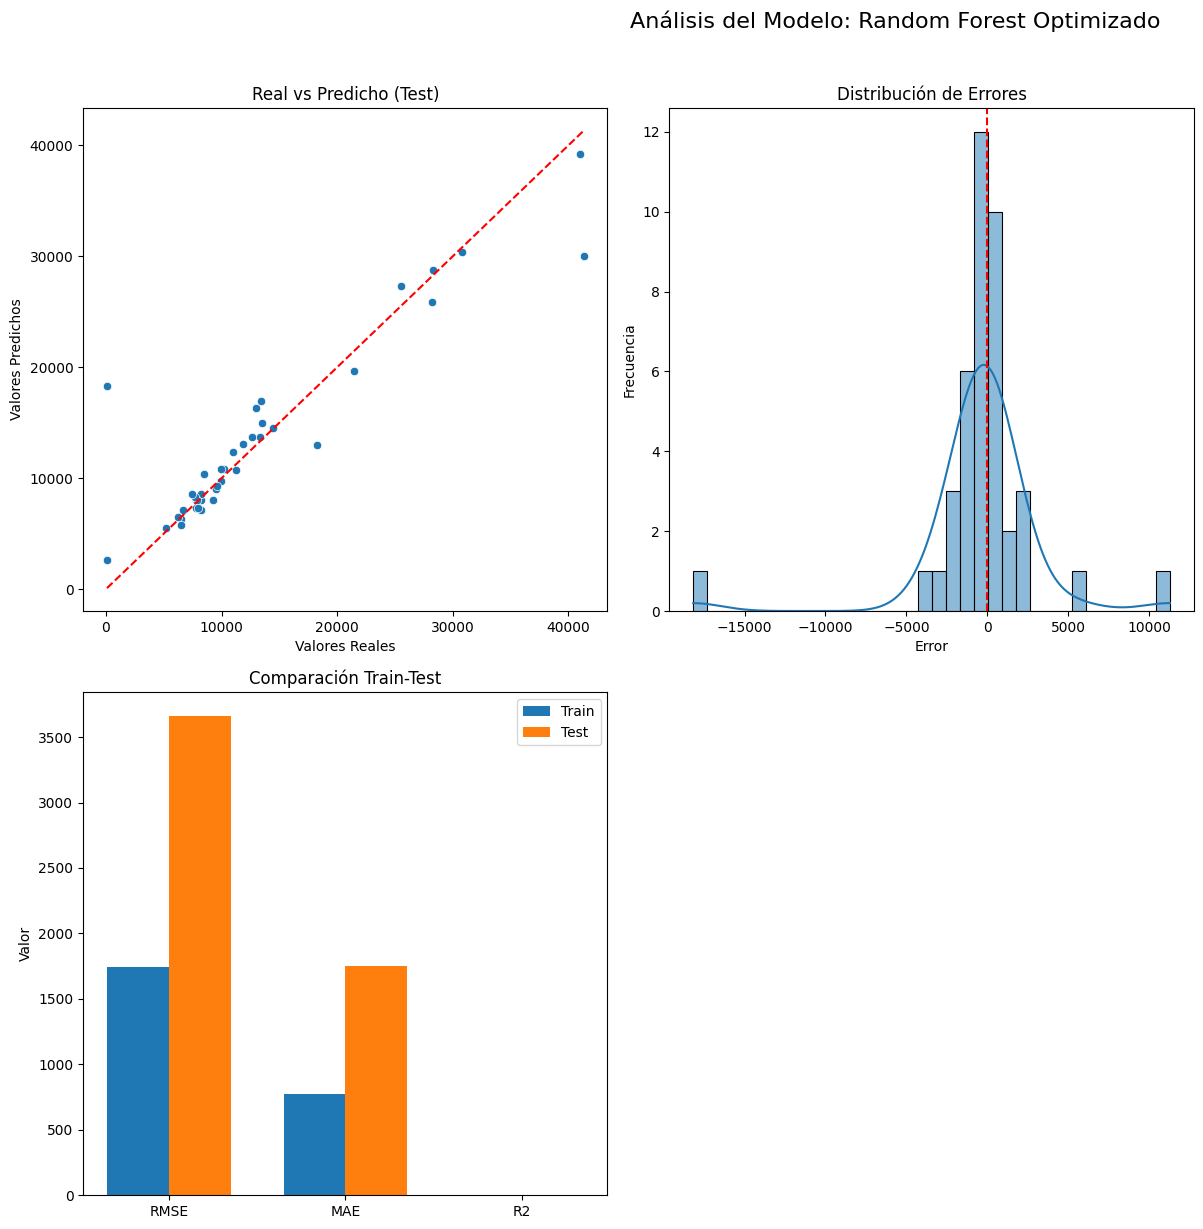


------------------------------------------------------------
EVALUACIÓN DE RANDOM FOREST OPTIMIZADO
------------------------------------------------------------
Métrica             Train          Test           
------------------------------------------------------------
RMSE                1746.1199      3660.3964      
MAE                 776.9278       1748.2953                     
------------------------------------------------------------



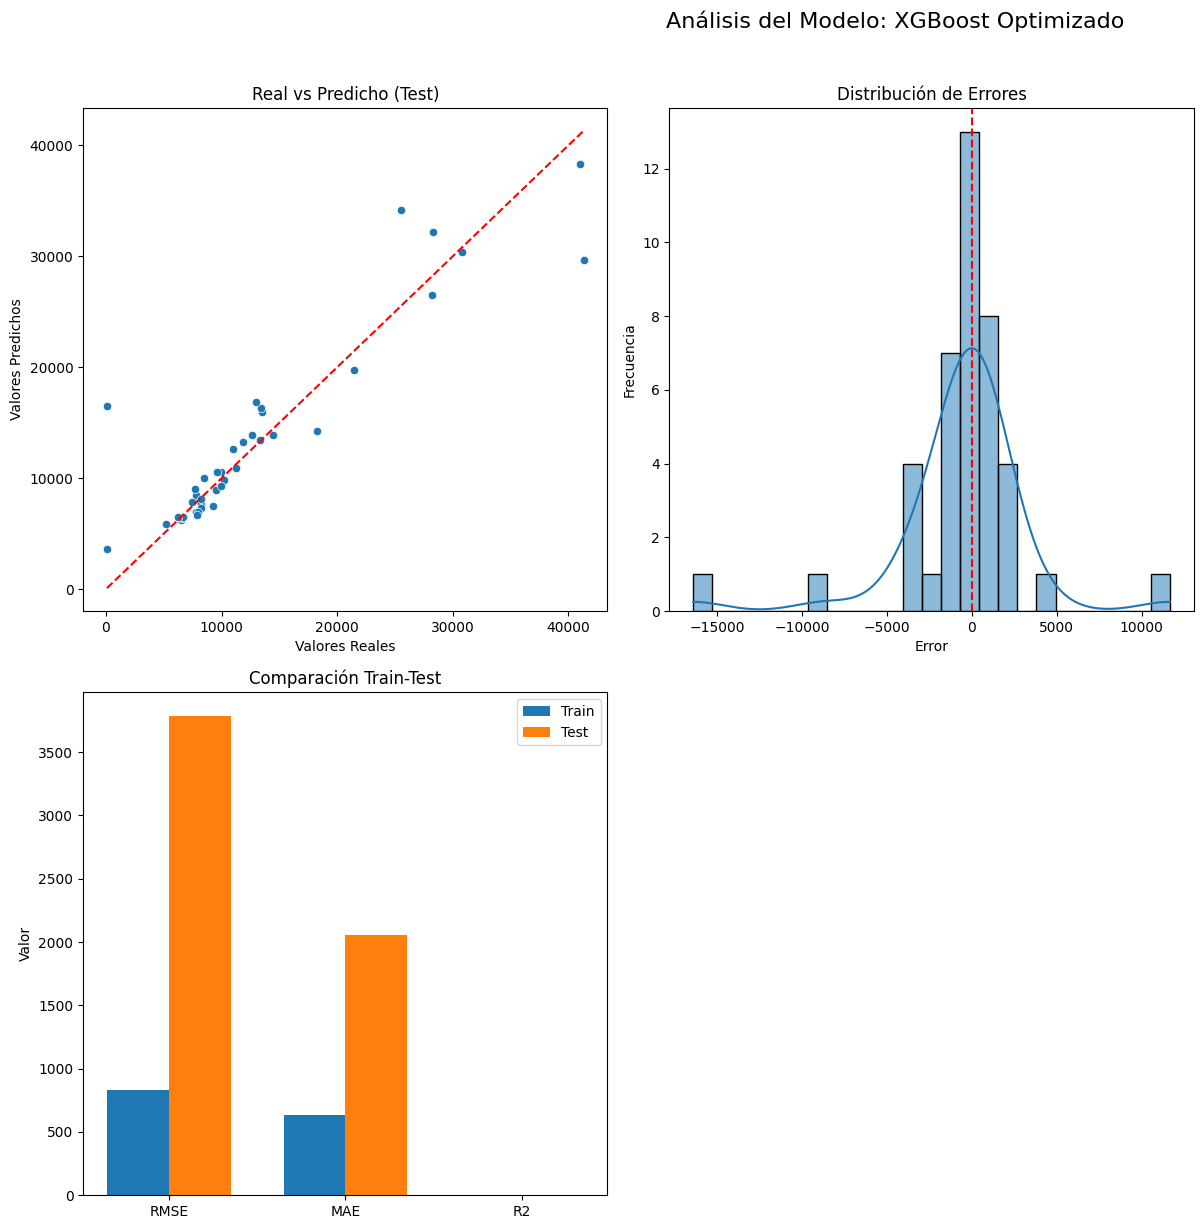


------------------------------------------------------------
EVALUACIÓN DE XGBOOST OPTIMIZADO
------------------------------------------------------------
Métrica             Train          Test           
------------------------------------------------------------
RMSE                834.3776       3784.4273      
MAE                 631.7527       2059.4105                     
------------------------------------------------------------


RESUMEN COMPARATIVO DE MODELOS:


,RMSE_test,MAE_test,R2_test
Linear Regression,4400.4858,3224.6362,0.7756
Random Forest,3660.3964,1748.2953,0.8447
XGBoost,3784.4273,2059.4105,0.8340


/tmp/ipython-input-40-438053712.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resultados_df.reset_index(), x='index', y='R2_test', palette='viridis')


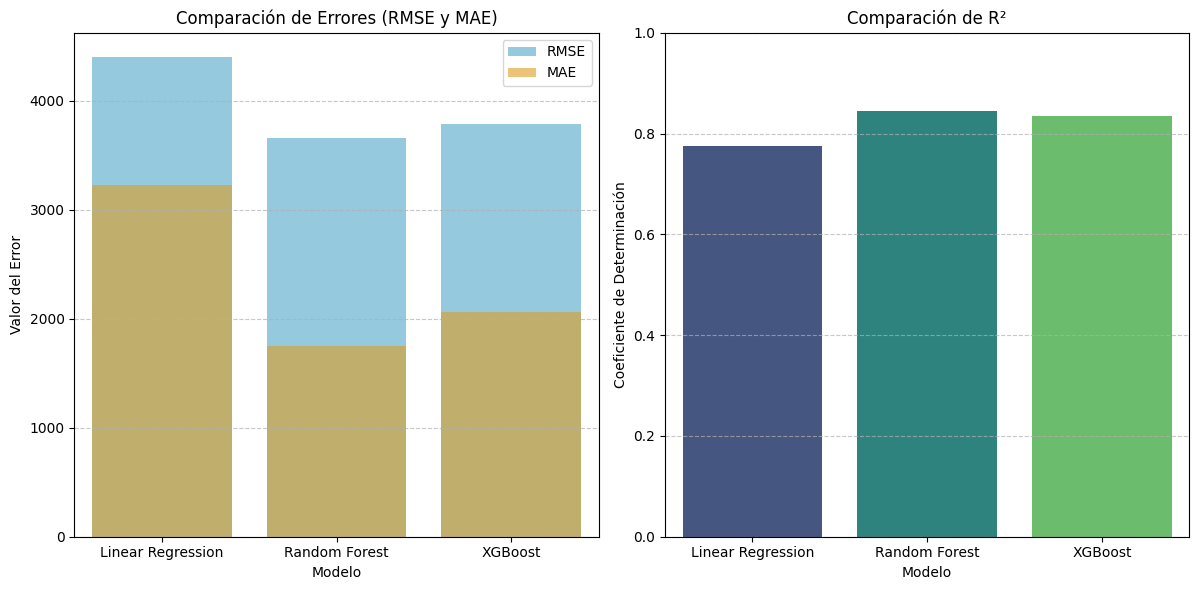


ANÁLISIS FINAL:
- Mejor modelo según RMSE: Random Forest (3660.3964)
- Mejor modelo según R²: Random Forest (0.8447)


In [40]:
# ---------------------------------------------------------------
# COMPARACIÓN FINAL MEJORADA DE MODELOS - AUTOS
# ---------------------------------------------------------------
print("\n" + "="*70)
print("COMPARACIÓN FINAL DE MODELOS - AUTOS DATASET (REGRESIÓN)")
print("="*70)

# Evaluar todos los modelos y recolectar resultados
metricas_lr = evaluar_modelo_regresion(pipe_lr, X_train, X_test, y_train, y_test, "Linear Regression")
metricas_rf = evaluar_modelo_regresion(grid_rf, X_train, X_test, y_train, y_test, "Random Forest Optimizado")
metricas_xgb = evaluar_modelo_regresion(grid_xgb, X_train, X_test, y_train, y_test, "XGBoost Optimizado")

# Crear DataFrame comparativo mejorado
resultados = {
    'Linear Regression': {
        'RMSE_test': metricas_lr['RMSE_test'],
        'MAE_test': metricas_lr['MAE_test'],
        'R2_test': metricas_lr['R2_test']

    },
    'Random Forest': {
        'RMSE_test': metricas_rf['RMSE_test'],
        'MAE_test': metricas_rf['MAE_test'],
        'R2_test': metricas_rf['R2_test']

    },
    'XGBoost': {
        'RMSE_test': metricas_xgb['RMSE_test'],
        'MAE_test': metricas_xgb['MAE_test'],
        'R2_test': metricas_xgb['R2_test']

    }
}

resultados_df = pd.DataFrame(resultados).T

# Mostrar resumen comparativo mejorado
print("\nRESUMEN COMPARATIVO DE MODELOS:")
display(resultados_df.style
        .background_gradient(cmap='Blues', subset=['RMSE_test', 'MAE_test'])
        .background_gradient(cmap='Greens', subset=['R2_test'])
        .format({'RMSE_test': '{:.4f}',
                 'MAE_test': '{:.4f}',
                 'R2_test': '{:.4f}'
                 }))

# Gráficos de comparación mejorados
plt.figure(figsize=(18, 6))

# Gráfico 1: Comparación de RMSE y MAE
plt.subplot(1, 3, 1)
sns.barplot(data=resultados_df.reset_index(), x='index', y='RMSE_test', color='skyblue', label='RMSE')
sns.barplot(data=resultados_df.reset_index(), x='index', y='MAE_test', color='orange', alpha=0.6, label='MAE')
plt.title('Comparación de Errores (RMSE y MAE)')
plt.ylabel('Valor del Error')
plt.xlabel('Modelo')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico 2: Comparación de R²
plt.subplot(1, 3, 2)
sns.barplot(data=resultados_df.reset_index(), x='index', y='R2_test', palette='viridis')
plt.title('Comparación de R²')
plt.ylabel('Coeficiente de Determinación')
plt.xlabel('Modelo')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

# Análisis de mejor modelo
mejor_modelo_rmse = resultados_df['RMSE_test'].idxmin()
mejor_modelo_r2 = resultados_df['R2_test'].idxmax()

print(f"\nANÁLISIS FINAL:")
print(f"- Mejor modelo según RMSE: {mejor_modelo_rmse} ({resultados_df.loc[mejor_modelo_rmse, 'RMSE_test']:.4f})")
print(f"- Mejor modelo según R²: {mejor_modelo_r2} ({resultados_df.loc[mejor_modelo_r2, 'R2_test']:.4f})")


## Modelos mejorados con optuna


In [28]:
pip install optuna

In [29]:
import optuna
from sklearn.metrics import mean_squared_error
from functools import partial

# Función para optimizar Random Forest con Optuna
def objective_rf(trial, X, y):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 5, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_float('max_features', 0.1, 1.0)
    }

    model = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(random_state=42, **params))
    ])

    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    return np.mean(scores)

# Función para optimizar XGBoost con Optuna
def objective_xgb(trial, X, y):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),  # Más espacio
        'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.5),  # Más alto
        'max_depth': trial.suggest_int('max_depth', 4, 12),  # Mayor profundidad
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),  # Evitar underfitting
        'gamma': trial.suggest_float('gamma', 0, 0.5),  # Más restrictivo
    }

    model = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', XGBRegressor(random_state=42, **params))
    ])

    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    return np.mean(scores)

# Optimización para Random Forest
print("\n" + "="*50)
print("OPTIMIZANDO RANDOM FOREST CON OPTUNA")
print("="*50)

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(partial(objective_rf, X=X_train, y=y_train), n_trials=50)

print("\nMejores parámetros para Random Forest:")
print(study_rf.best_params)
print(f"Mejor puntuación (neg MSE): {study_rf.best_value:.4f}")

# Optimización para XGBoost
print("\n" + "="*50)
print("OPTIMIZANDO XGBOOST CON OPTUNA")
print("="*50)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(partial(objective_xgb, X=X_train, y=y_train), n_trials=50)

print("\nMejores parámetros para XGBoost:")
print(study_xgb.best_params)
print(f"Mejor puntuación (neg MSE): {study_xgb.best_value:.4f}")

# Entrenamiento y evaluación de modelos optimizados
print("\n" + "="*50)
print("EVALUACIÓN FINAL DE MODELOS OPTIMIZADOS")
print("="*50)

# 1. Regresión Lineal (sin optimización)
pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# 2. Random Forest optimizado
best_rf_params = study_rf.best_params
pipe_rf_opt = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, **best_rf_params))
])
pipe_rf_opt.fit(X_train, y_train)
y_pred_rf = pipe_rf_opt.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# 3. XGBoost optimizado
best_xgb_params = study_xgb.best_params
pipe_xgb_opt = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42, **best_xgb_params))
])
pipe_xgb_opt.fit(X_train, y_train)
y_pred_xgb = pipe_xgb_opt.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

# Comparación de resultados
print("\nCOMPARACIÓN DE RESULTADOS EN TEST:")
print(f"- Regresión Lineal RMSE: {rmse_lr:.4f}")
print(f"- Random Forest RMSE (optimizado): {rmse_rf:.4f} (antes: {np.sqrt(-grid_rf.best_score_):.4f})")
print(f"- XGBoost RMSE (optimizado): {rmse_xgb:.4f} (antes: {np.sqrt(-grid_xgb.best_score_):.4f})")

# Identificar el mejor modelo
results = {
    'Linear Regression': rmse_lr,
    'Random Forest': rmse_rf,
    'XGBoost': rmse_xgb
}

best_model_name = min(results, key=results.get)
print(f"\nEl mejor modelo es: {best_model_name} con RMSE: {results[best_model_name]:.4f}")

[I 2025-07-14 15:18:59,220] A new study created in memory with name: no-name-59dfad8b-0aea-4418-b039-12bea76643d3



OPTIMIZANDO RANDOM FOREST CON OPTUNA


[I 2025-07-14 15:19:02,544] Trial 0 finished with value: -17556068.791018046 and parameters: {'n_estimators': 249, 'max_depth': 30, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 0.5161740025439285}. Best is trial 0 with value: -17556068.791018046.
[I 2025-07-14 15:19:11,781] Trial 1 finished with value: -24901015.152476393 and parameters: {'n_estimators': 399, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': 0.9991073456111921}. Best is trial 0 with value: -17556068.791018046.
[I 2025-07-14 15:19:17,856] Trial 2 finished with value: -25003753.119422607 and parameters: {'n_estimators': 384, 'max_depth': 31, 'min_samples_split': 16, 'min_samples_leaf': 8, 'max_features': 0.9014143160953827}. Best is trial 0 with value: -17556068.791018046.
[I 2025-07-14 15:19:24,134] Trial 3 finished with value: -22898509.11104812 and parameters: {'n_estimators': 236, 'max_depth': 32, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 0.188373645


Mejores parámetros para Random Forest:
{'n_estimators': 330, 'max_depth': 24, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 0.25773101958707206}
Mejor puntuación (neg MSE): -17335529.3095

OPTIMIZANDO XGBOOST CON OPTUNA


[I 2025-07-14 15:21:22,089] Trial 0 finished with value: -18110094.64312497 and parameters: {'n_estimators': 477, 'learning_rate': 0.48457447979407836, 'max_depth': 11, 'subsample': 0.9407345156150386, 'gamma': 0.24389842097342102}. Best is trial 0 with value: -18110094.64312497.
[I 2025-07-14 15:21:22,666] Trial 1 finished with value: -15751721.444316993 and parameters: {'n_estimators': 309, 'learning_rate': 0.44756796182549013, 'max_depth': 4, 'subsample': 0.9045281540009841, 'gamma': 0.2746080395089614}. Best is trial 1 with value: -15751721.444316993.
[I 2025-07-14 15:21:24,258] Trial 2 finished with value: -16688533.812102098 and parameters: {'n_estimators': 893, 'learning_rate': 0.4177156572293136, 'max_depth': 10, 'subsample': 0.9445529855261762, 'gamma': 0.1452280728207173}. Best is trial 1 with value: -15751721.444316993.
[I 2025-07-14 15:21:24,965] Trial 3 finished with value: -20605709.02390591 and parameters: {'n_estimators': 349, 'learning_rate': 0.3599969432252285, 'max_d


Mejores parámetros para XGBoost:
{'n_estimators': 440, 'learning_rate': 0.4976162640071006, 'max_depth': 8, 'subsample': 0.7973611233474382, 'gamma': 0.004730343902611289}
Mejor puntuación (neg MSE): -15712772.0503

EVALUACIÓN FINAL DE MODELOS OPTIMIZADOS

COMPARACIÓN DE RESULTADOS EN TEST:
- Regresión Lineal RMSE: 4400.4858
- Random Forest RMSE (optimizado): 4435.8155 (antes: 3951.0794)
- XGBoost RMSE (optimizado): 3608.1415 (antes: 3729.4323)

El mejor modelo es: XGBoost con RMSE: 3608.1415


In [51]:
# Evaluar modelos sin Optuna (usando los resultados de GridSearchCV)
rmse_rf_grid = np.sqrt(-grid_rf.best_score_) # RMSE en validación para RF con GridSearchCV
rmse_xgb_grid = np.sqrt(-grid_xgb.best_score_) # RMSE en validación para XGB con GridSearchCV

# Evaluar modelos optimizados con Optuna en el conjunto de test

# Crear un DataFrame para la comparación
comparar_data = {
    'Modelo': ['Linear Regression', 'Random Forest (GridSearchCV)', 'Random Forest (Optuna)', 'XGBoost (GridSearchCV)', 'XGBoost (Optuna)'],
    'RMSE (Validación/Test)': [rmse_lr, rmse_rf_grid, rmse_rf, rmse_xgb_grid, rmse_xgb]
}

comparar_df = pd.DataFrame(comparar_data)

print("\n" + "="*50)
print("COMPARACIÓN DE MODELOS CON Y SIN OPTIMIZACIÓN")
print("="*50)
display(comparar_df.style.background_gradient(cmap='Blues', subset=['RMSE (Validación/Test)']).format({'RMSE (Validación/Test)': '{:.4f}'}))

# Determinar el mejor modelo general (el que tiene el menor RMSE en el conjunto de test/validación)
mejor_modelo_final = comparar_df.loc[comparar_df['RMSE (Validación/Test)'].idxmin()]

print("\n" + "="*50)
print("MEJOR MODELO GENERAL")
print("="*50)
print(f"El mejor modelo es '{mejor_modelo_final['Modelo']}' con un RMSE de {mejor_modelo_final['RMSE (Validación/Test)']:.4f}.")



COMPARACIÓN DE MODELOS CON Y SIN OPTIMIZACIÓN


,Modelo,RMSE (Validación/Test)
0,Linear Regression,4400.4858
1,Random Forest (GridSearchCV),3951.0794
2,Random Forest (Optuna),4435.8155
3,XGBoost (GridSearchCV),3729.4323
4,XGBoost (Optuna),3608.1415



MEJOR MODELO GENERAL
El mejor modelo es 'XGBoost (Optuna)' con un RMSE de 3608.1415.
